#Installing Settings

In [1]:
import os

In [3]:

# prevent ultralytics from tracking your activity
!yolo settings sync=False



!pip install ultralytics
import ultralytics
ultralytics.checks()
from IPython import display
!yolo settings sync=False
display.clear_output()
!yolo mode=chocks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=chocks'. Valid modes are ['track', 'predict', 'val', 'benchmark', 'export', 'train'].

    Arguments received: ['yolo', 'mode=chocks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['classify', 'detect', 'pose', 'segment', 'obb']
                MODE (required) is one of ['track', 'predict', 'val', 'benchmark', 'export', 'train']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a 

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Importing Data


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="rHyOyfxzdkfOp7SJQlZt")
project = rf.workspace("itachi-amv-upkik").project("construction-safety-aochb")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


#Model Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Safety-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

#Evaluation

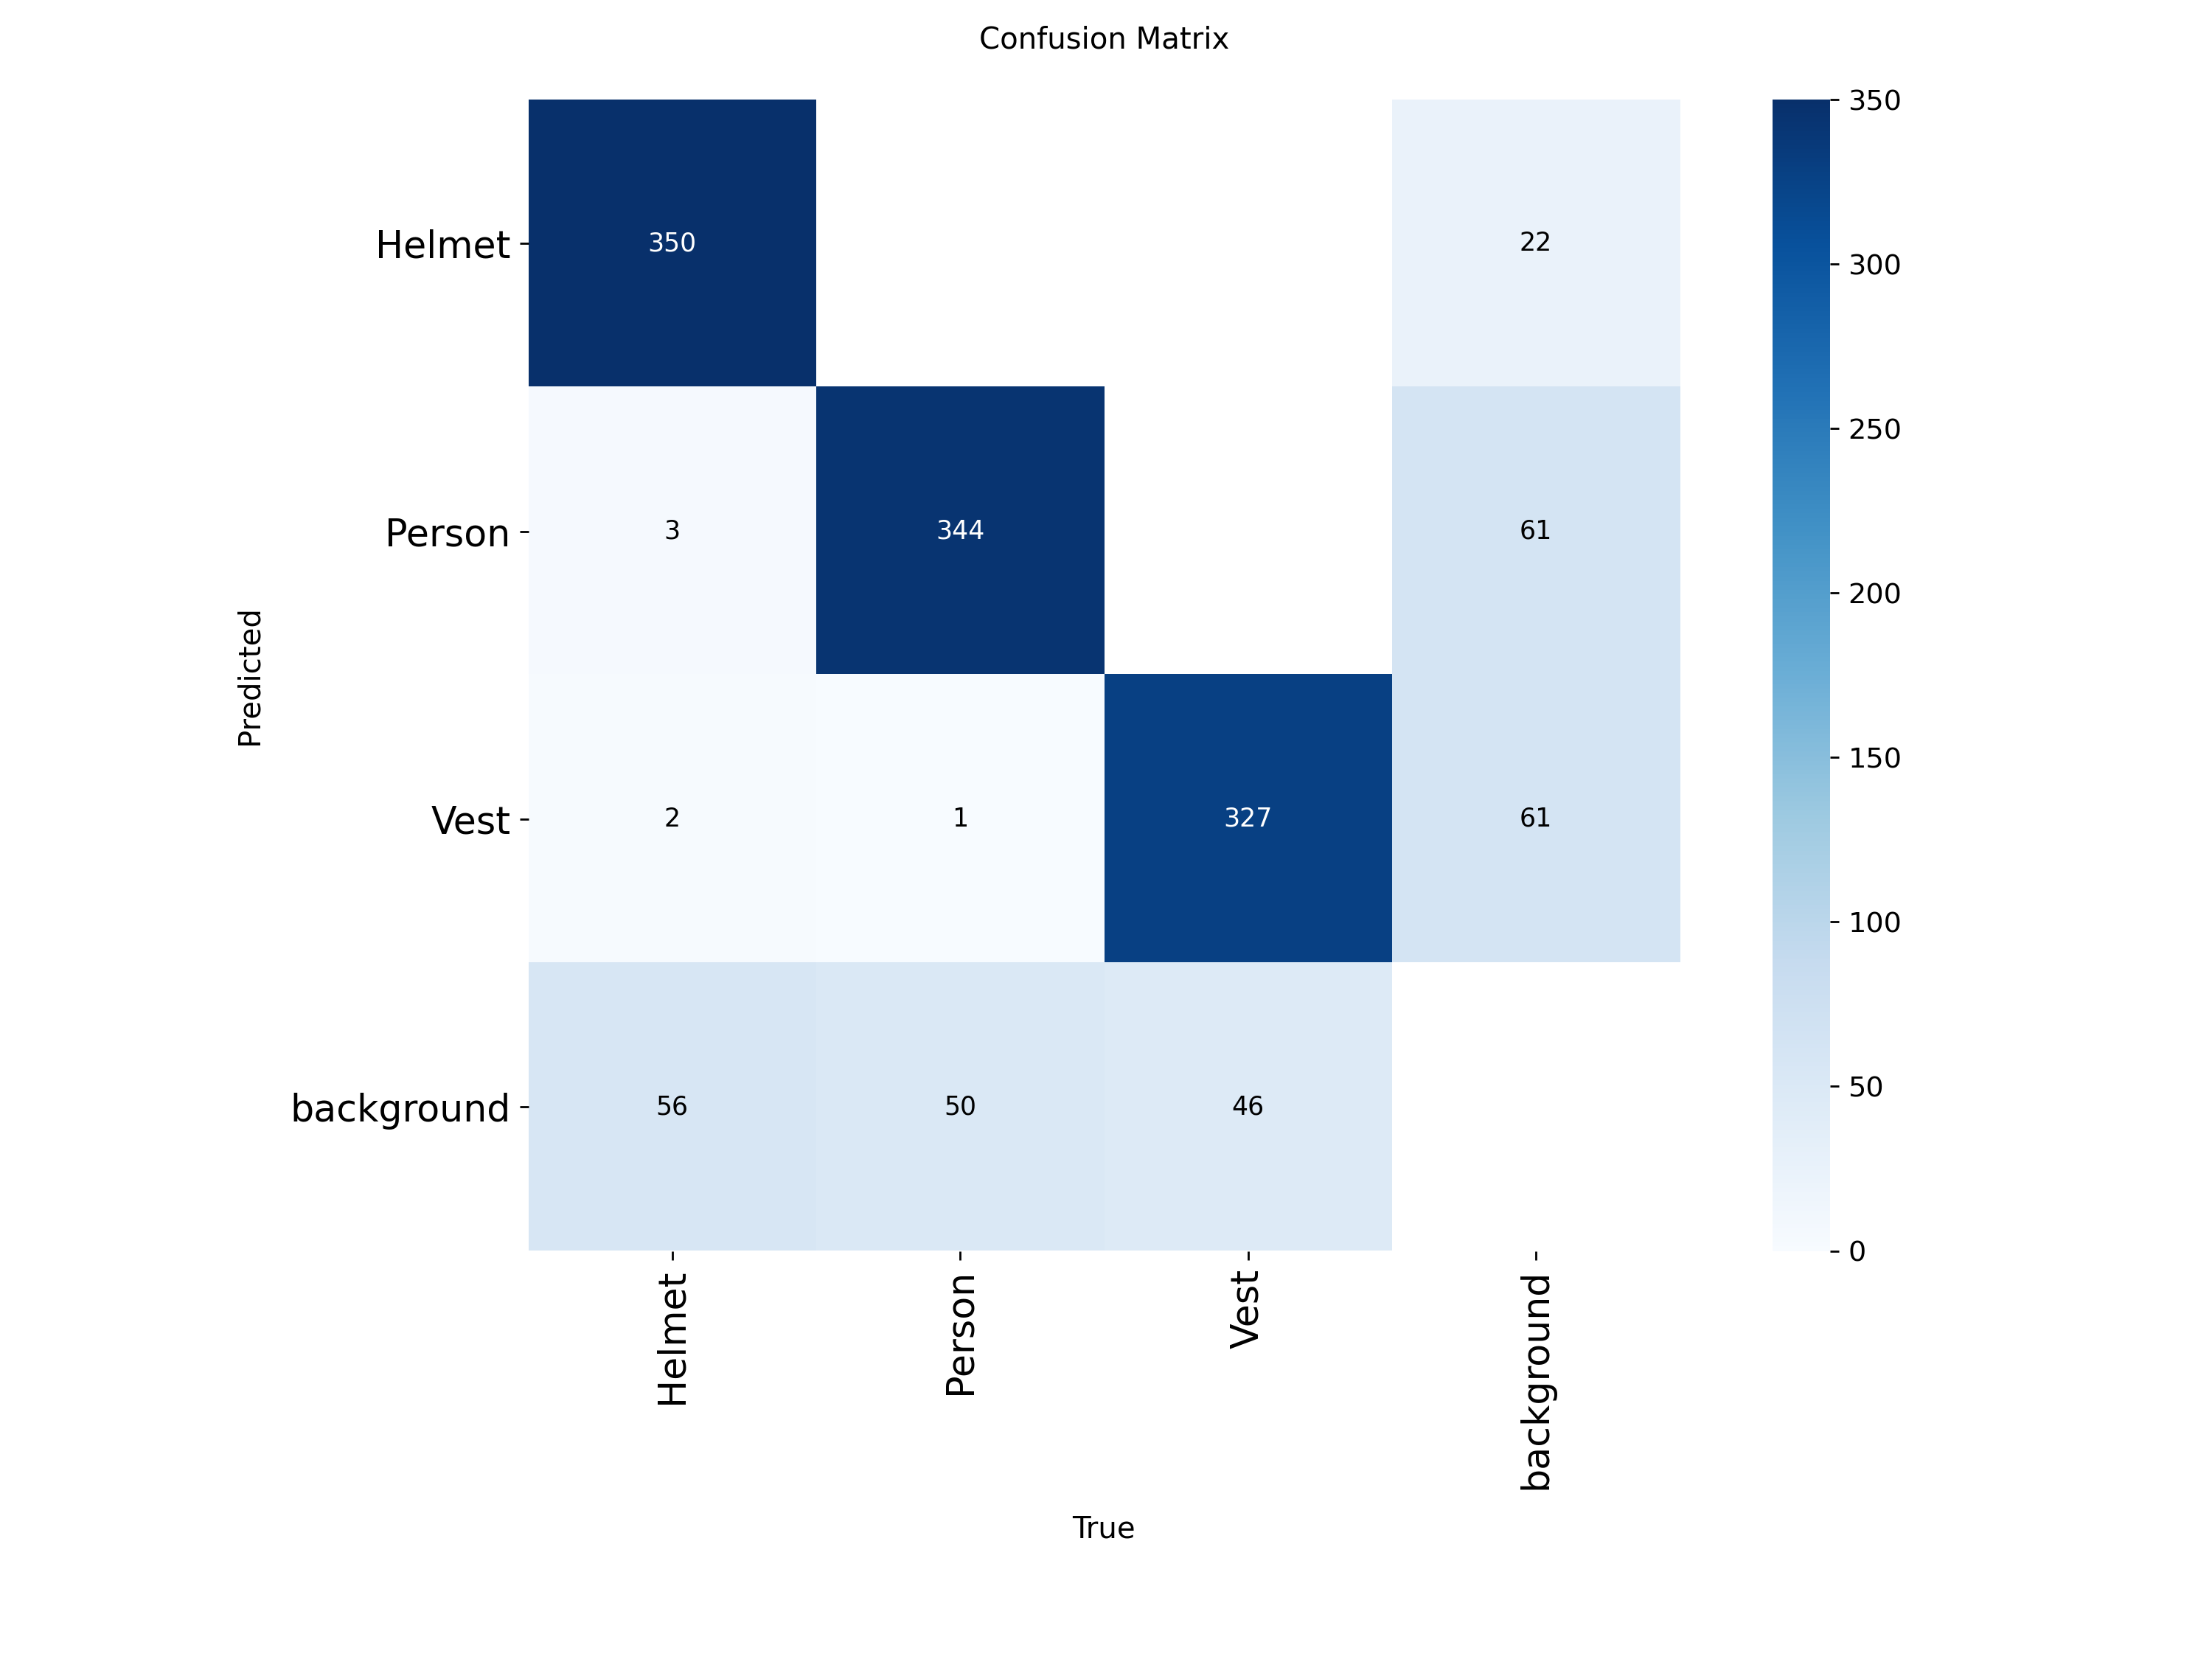

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

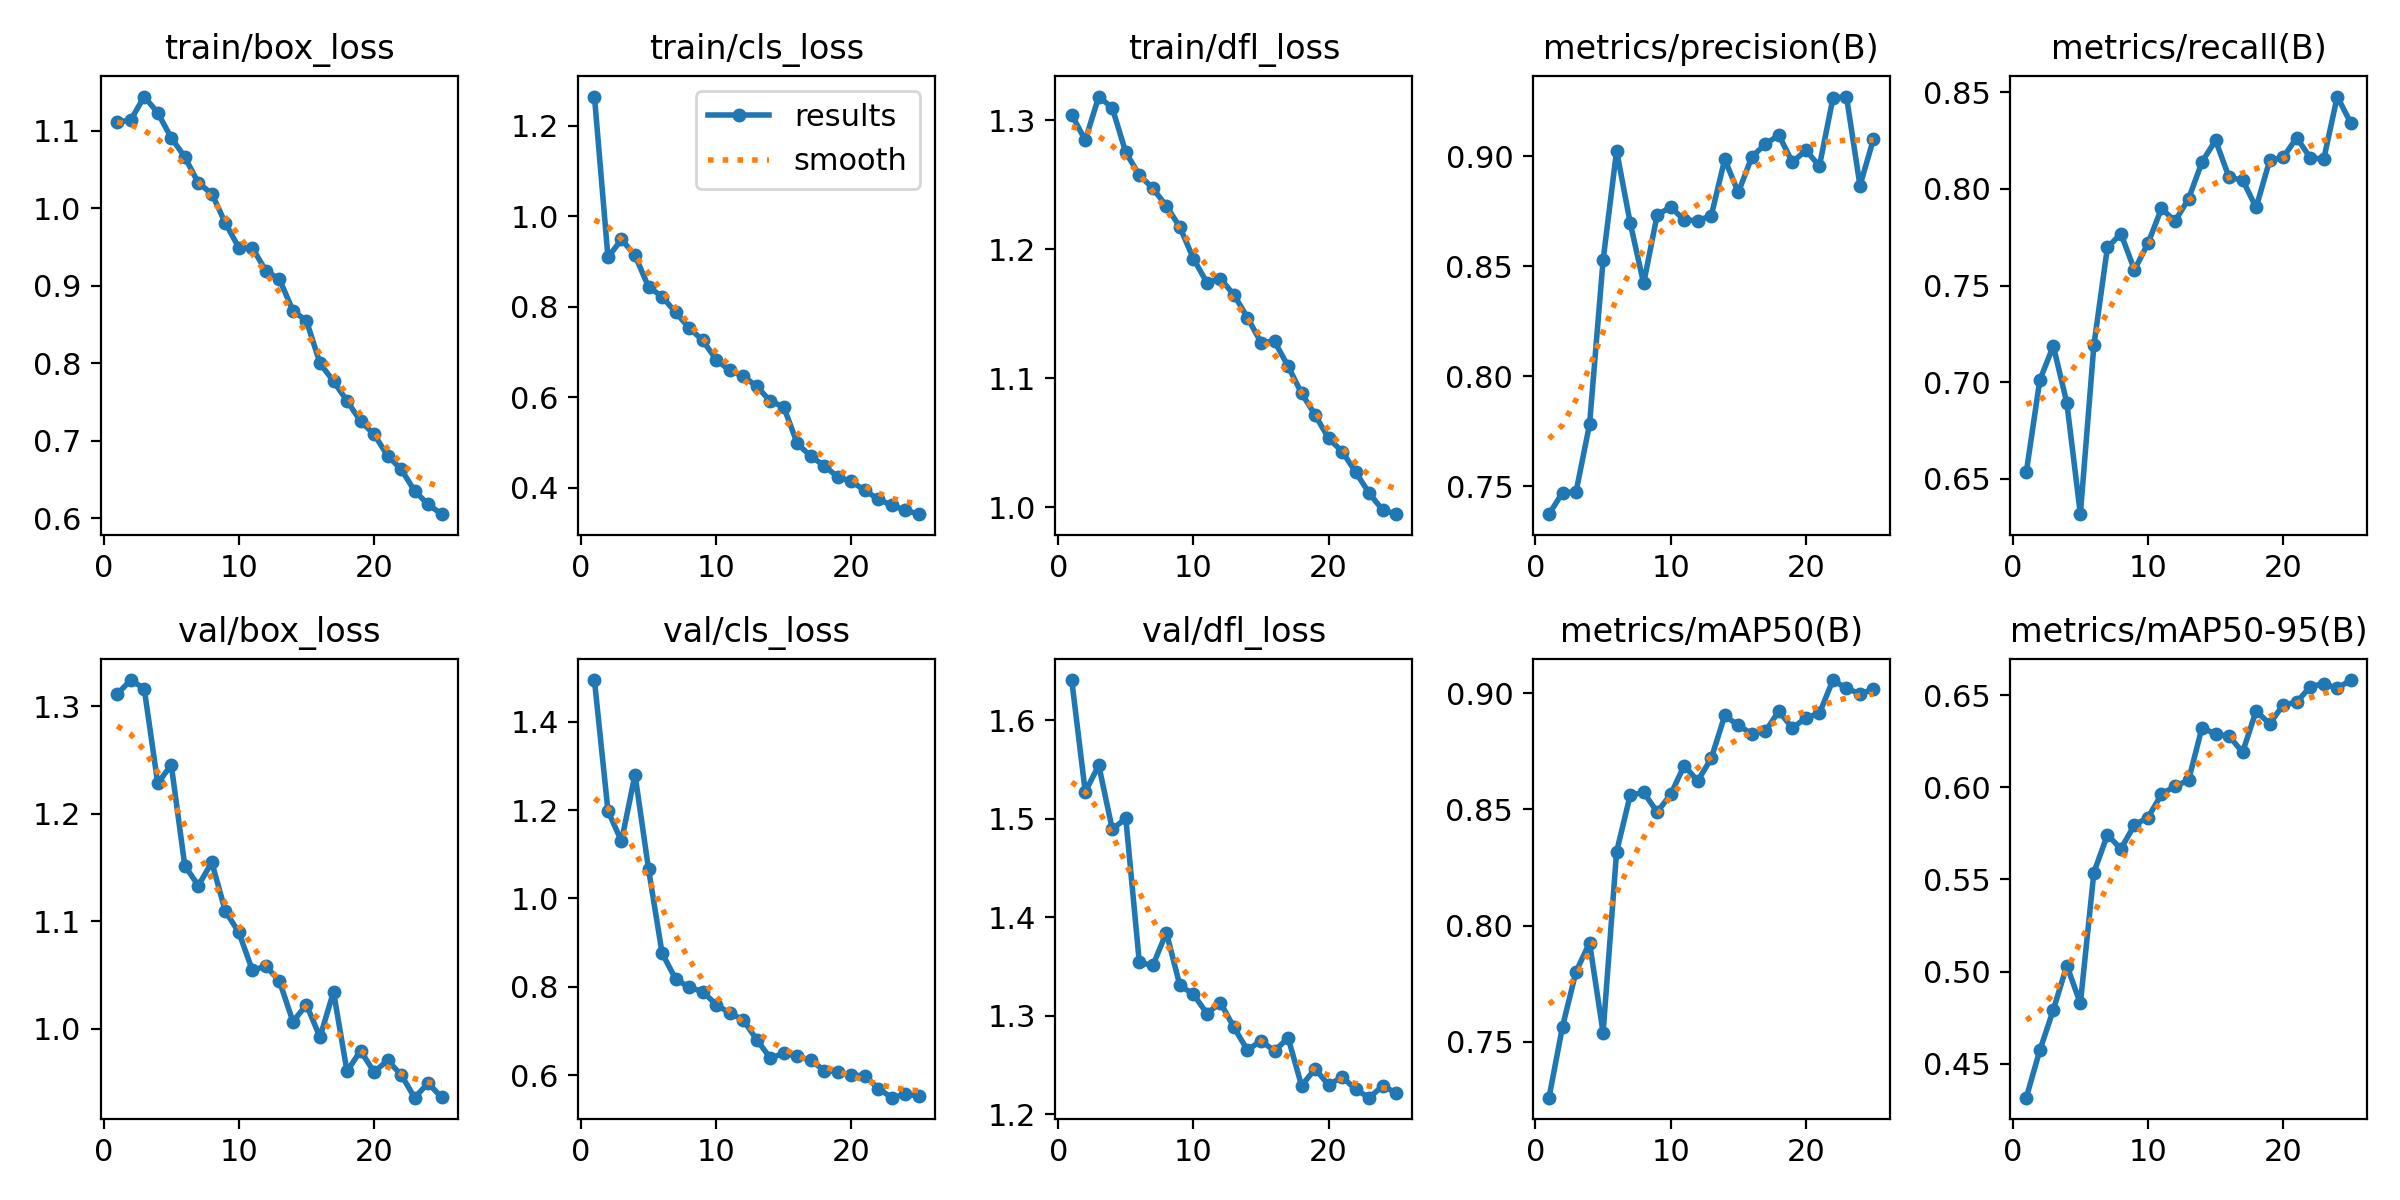

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml split=test

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1097.3±356.1 MB/s, size: 52.3 KB)
val: Scanning /content/Construction-Safety-1/test/labels.cache... 142 images, 0 backgrounds, 0 corrupt: 100% 142/142 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:03<00:00,  2.79it/s]
                   all        142        484      0.949      0.915      0.965      0.786
                Helmet        126        148      0.979      0.948      0.983      0.777
                Person        128        165      0.909      0.909      0.945      0.782
                  Vest        136        171       0.96      0.889      0.968      0.798
Speed: 0.3ms preprocess, 10.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at http

#View output images from results folder.

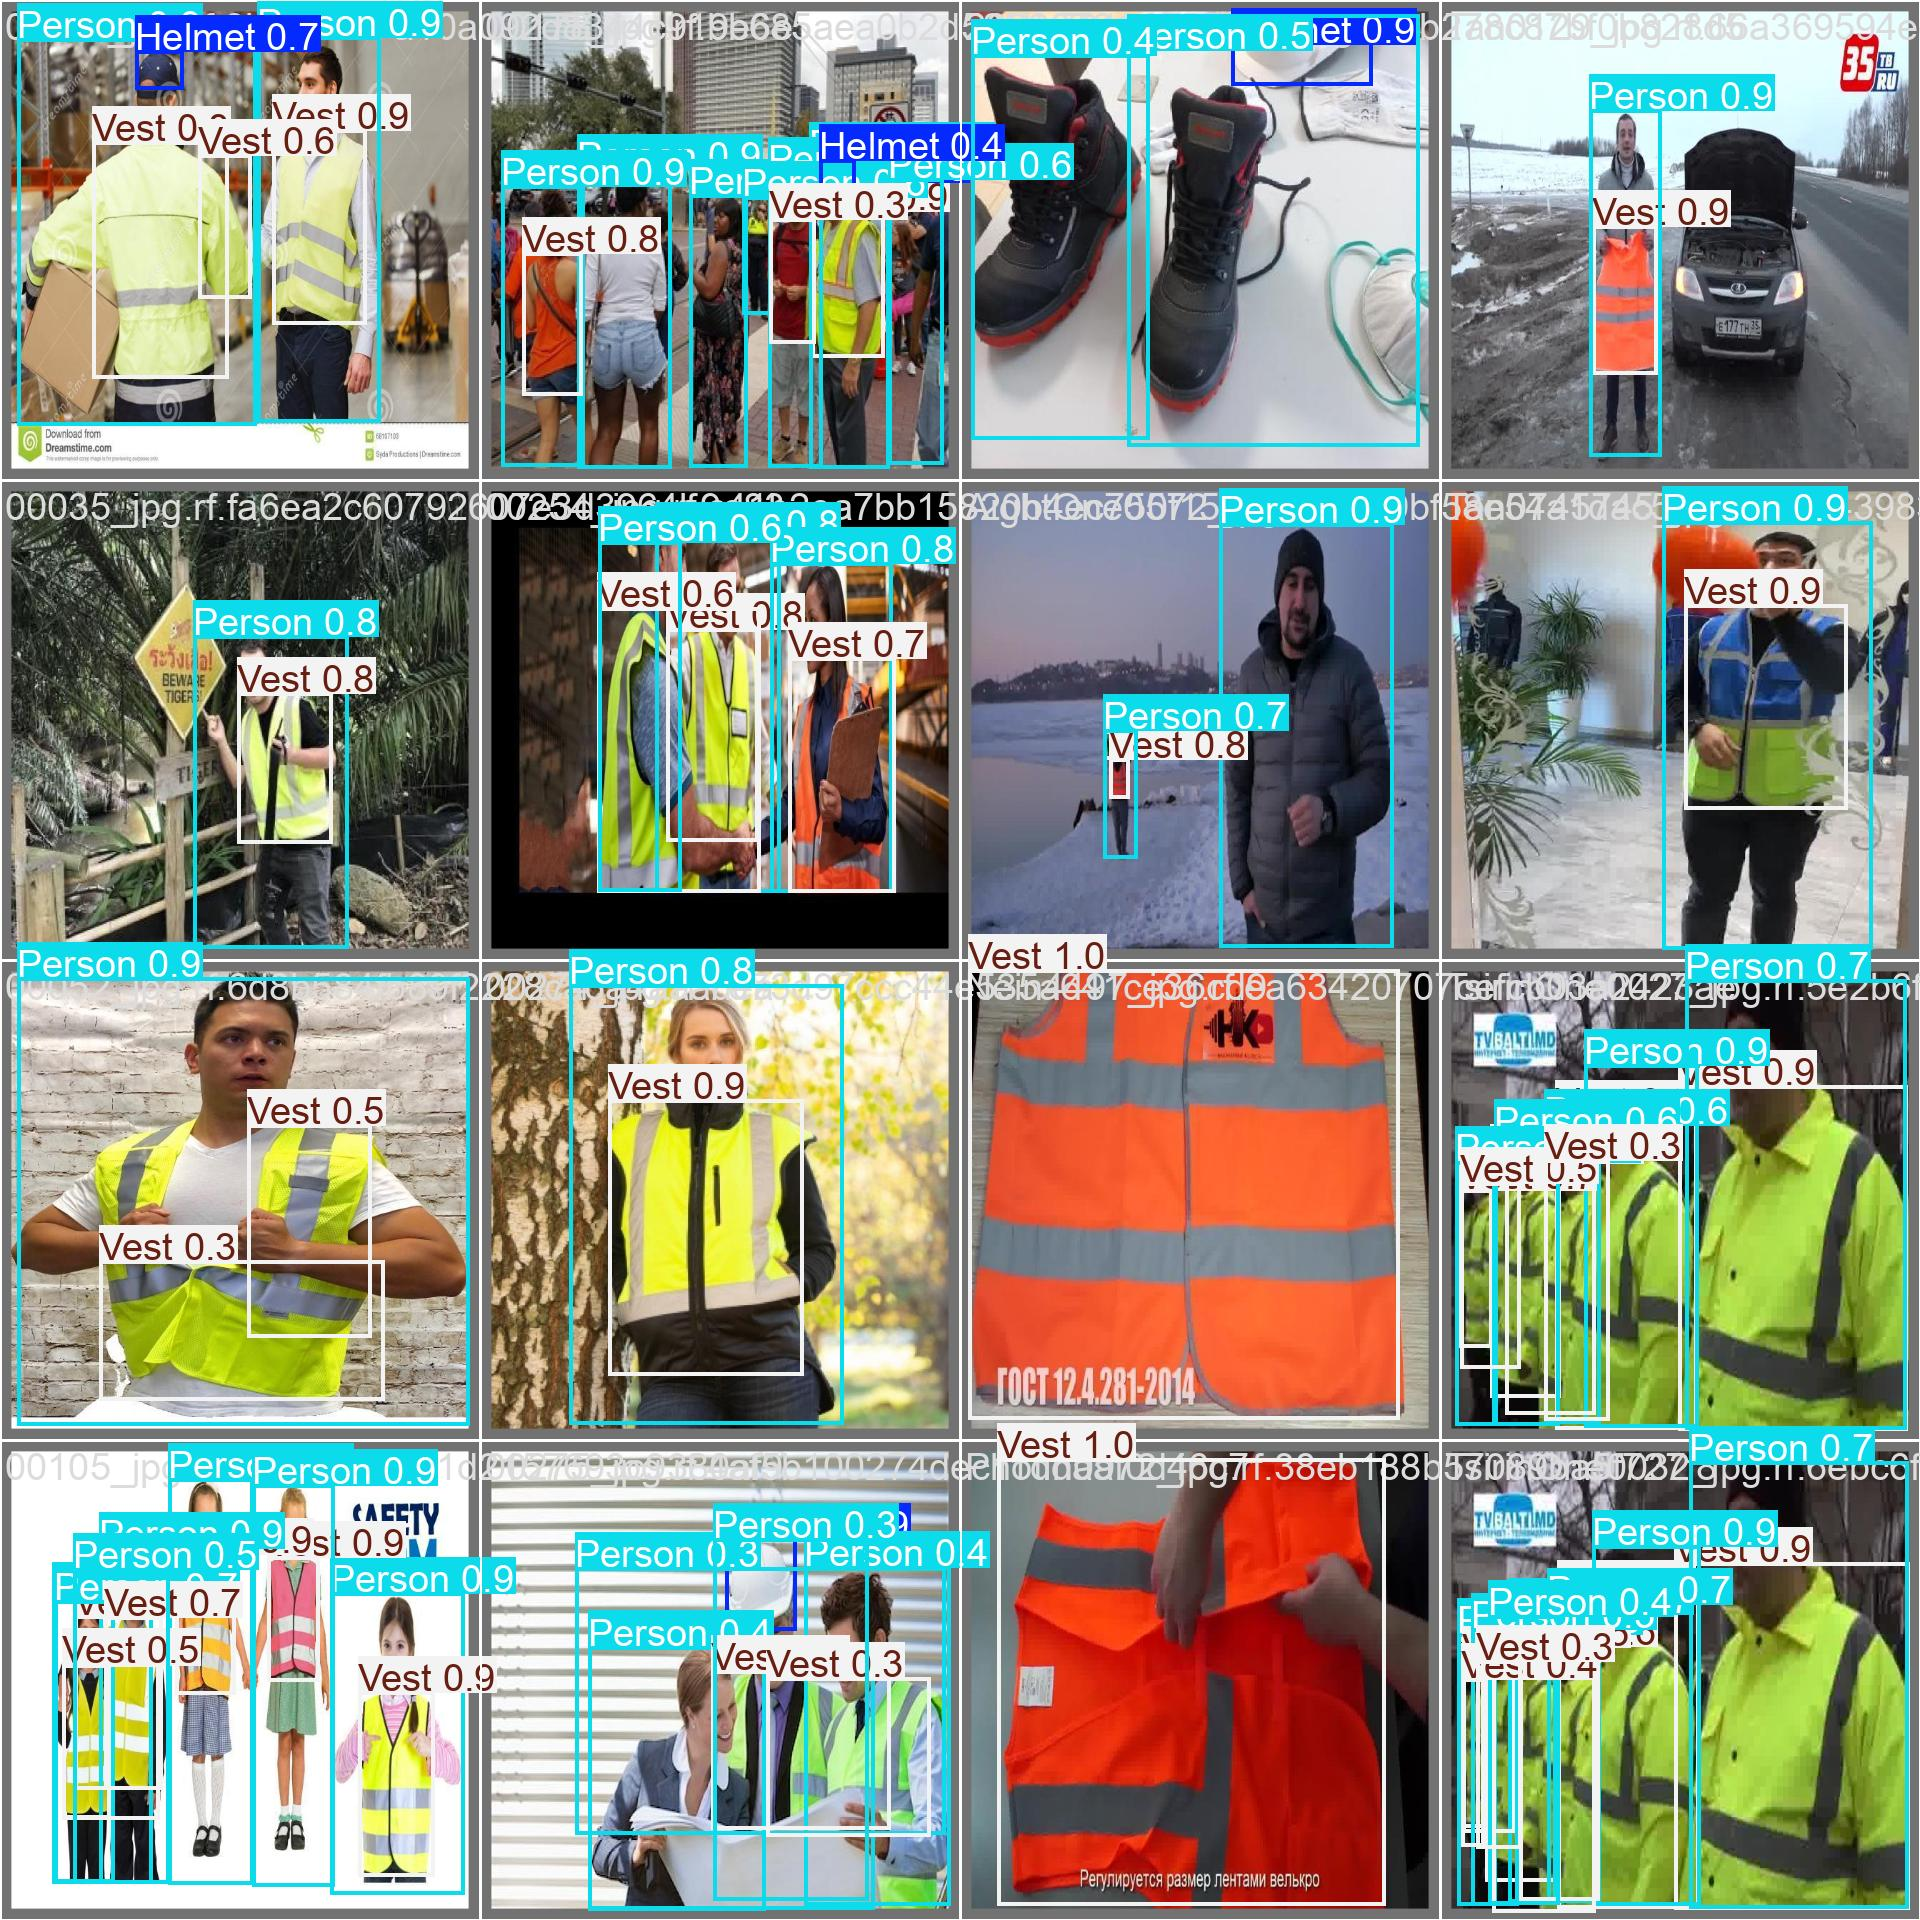

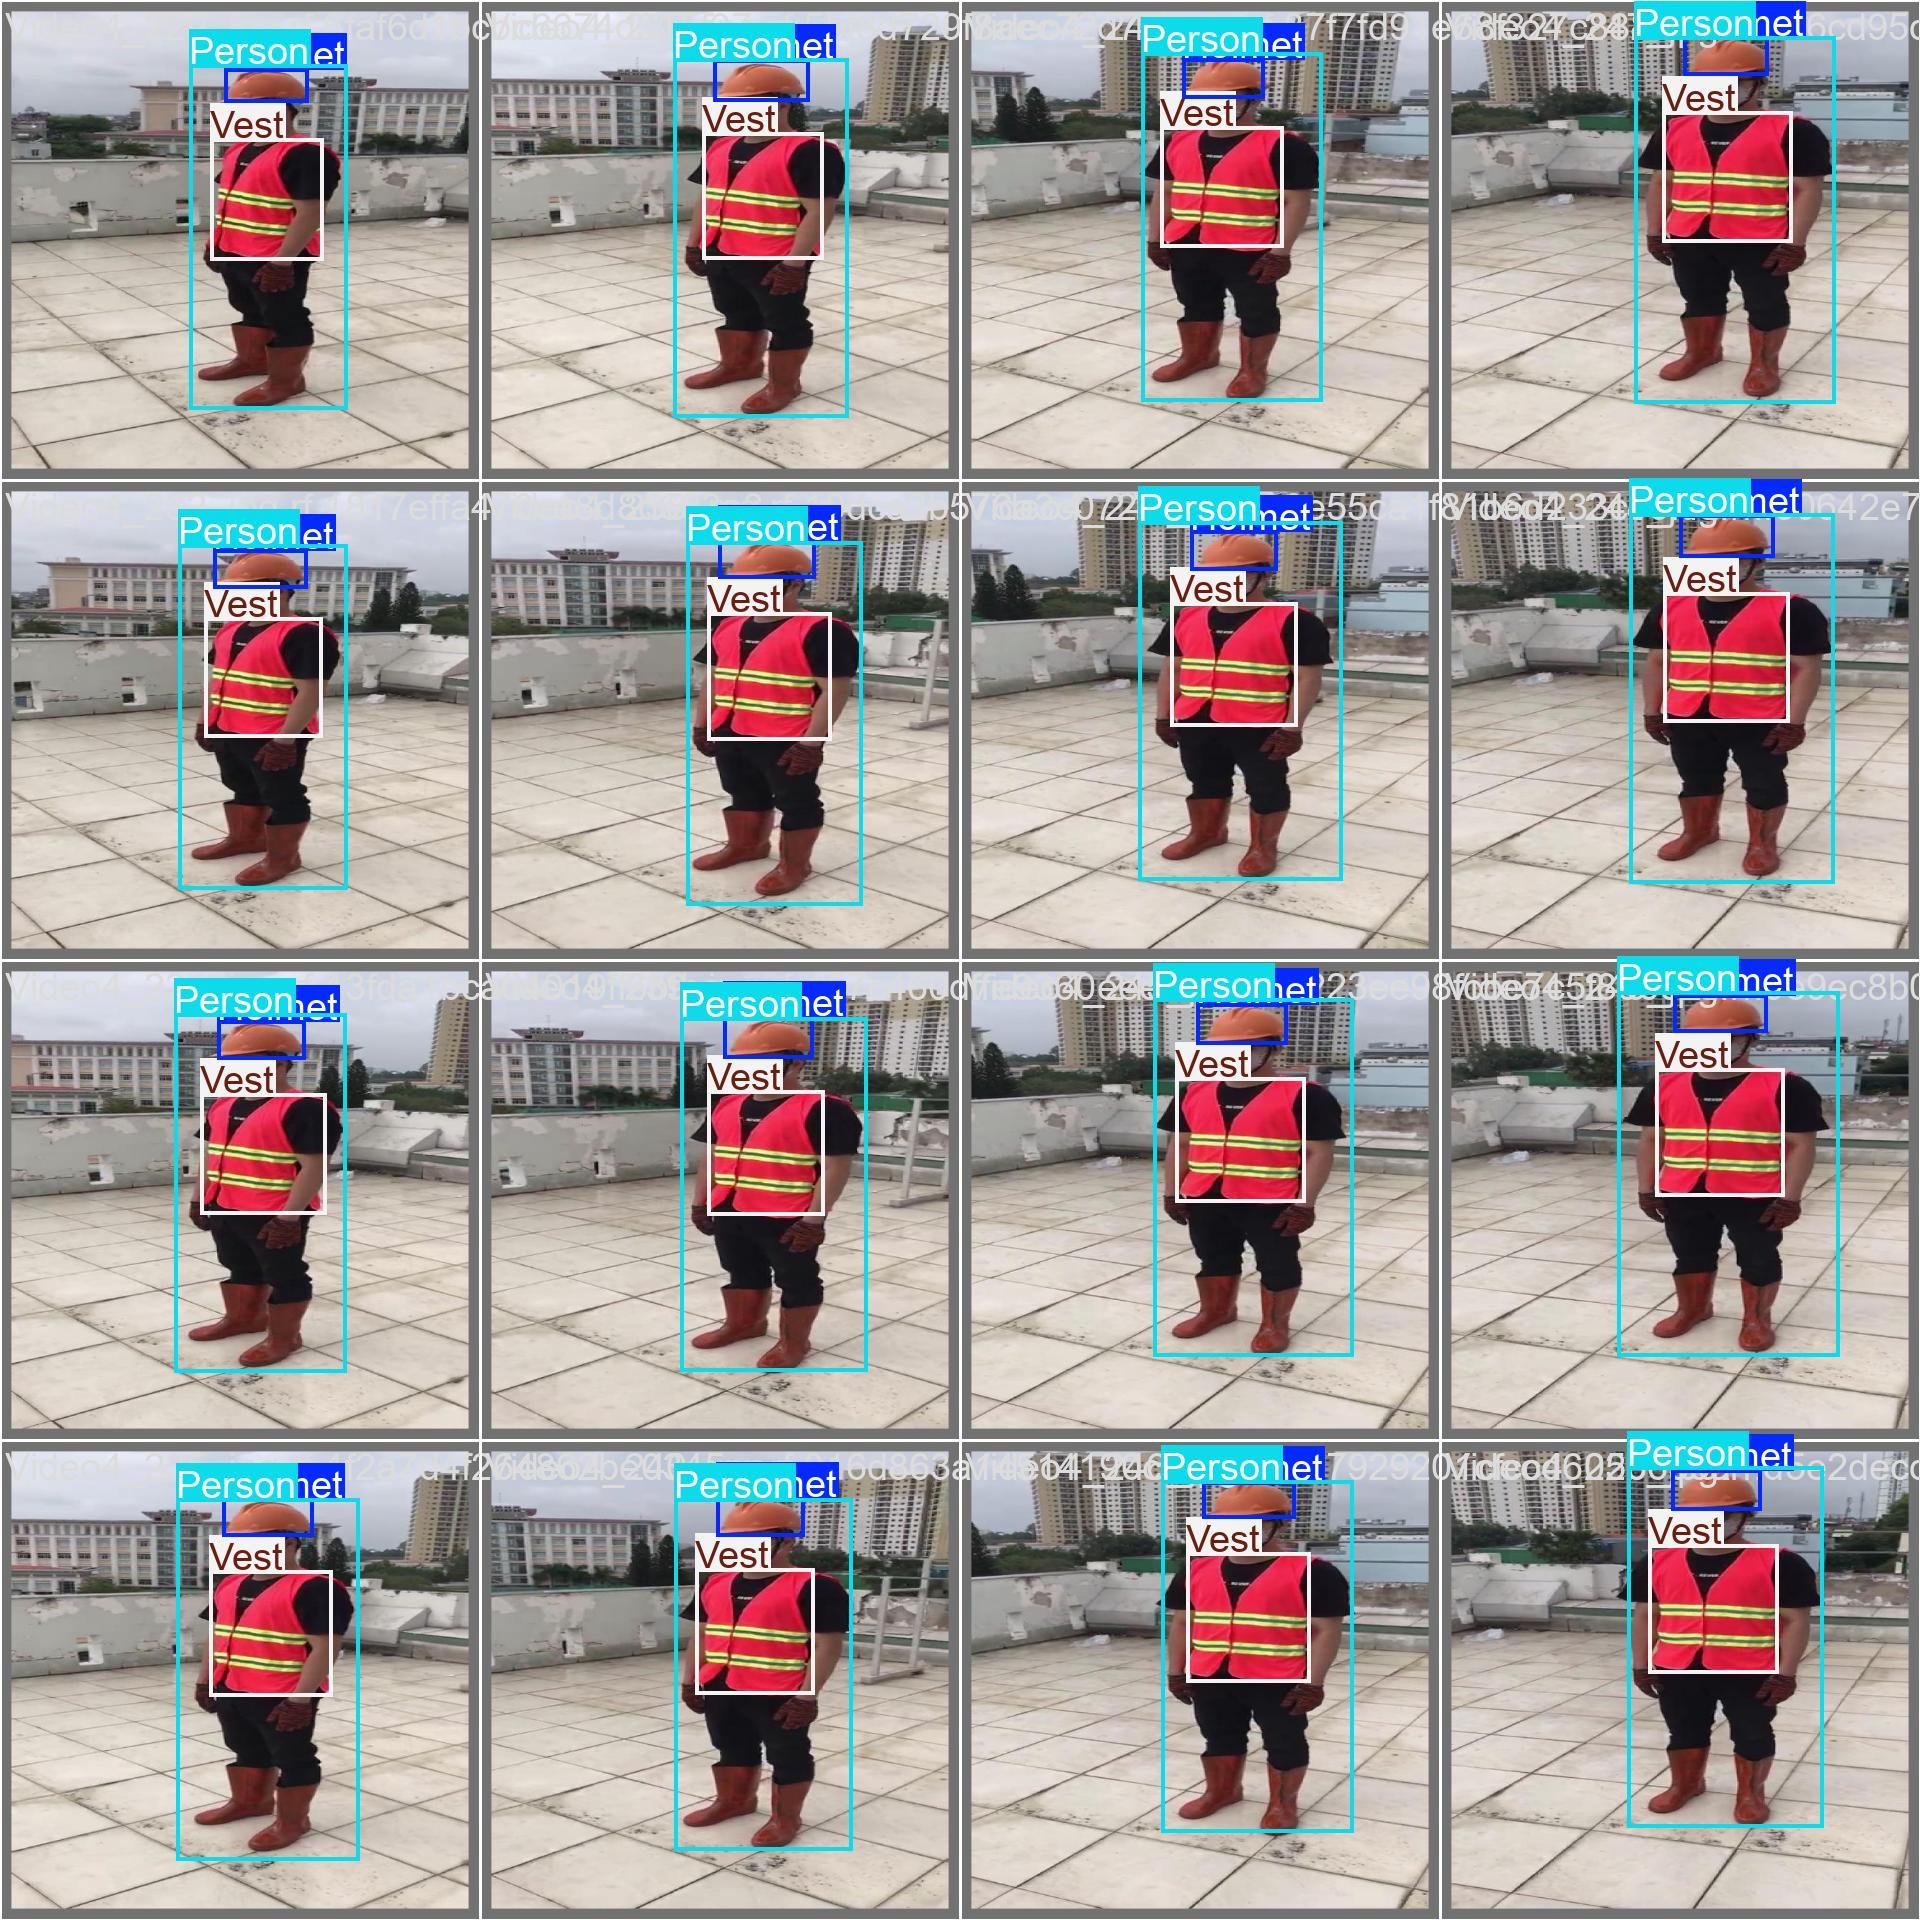

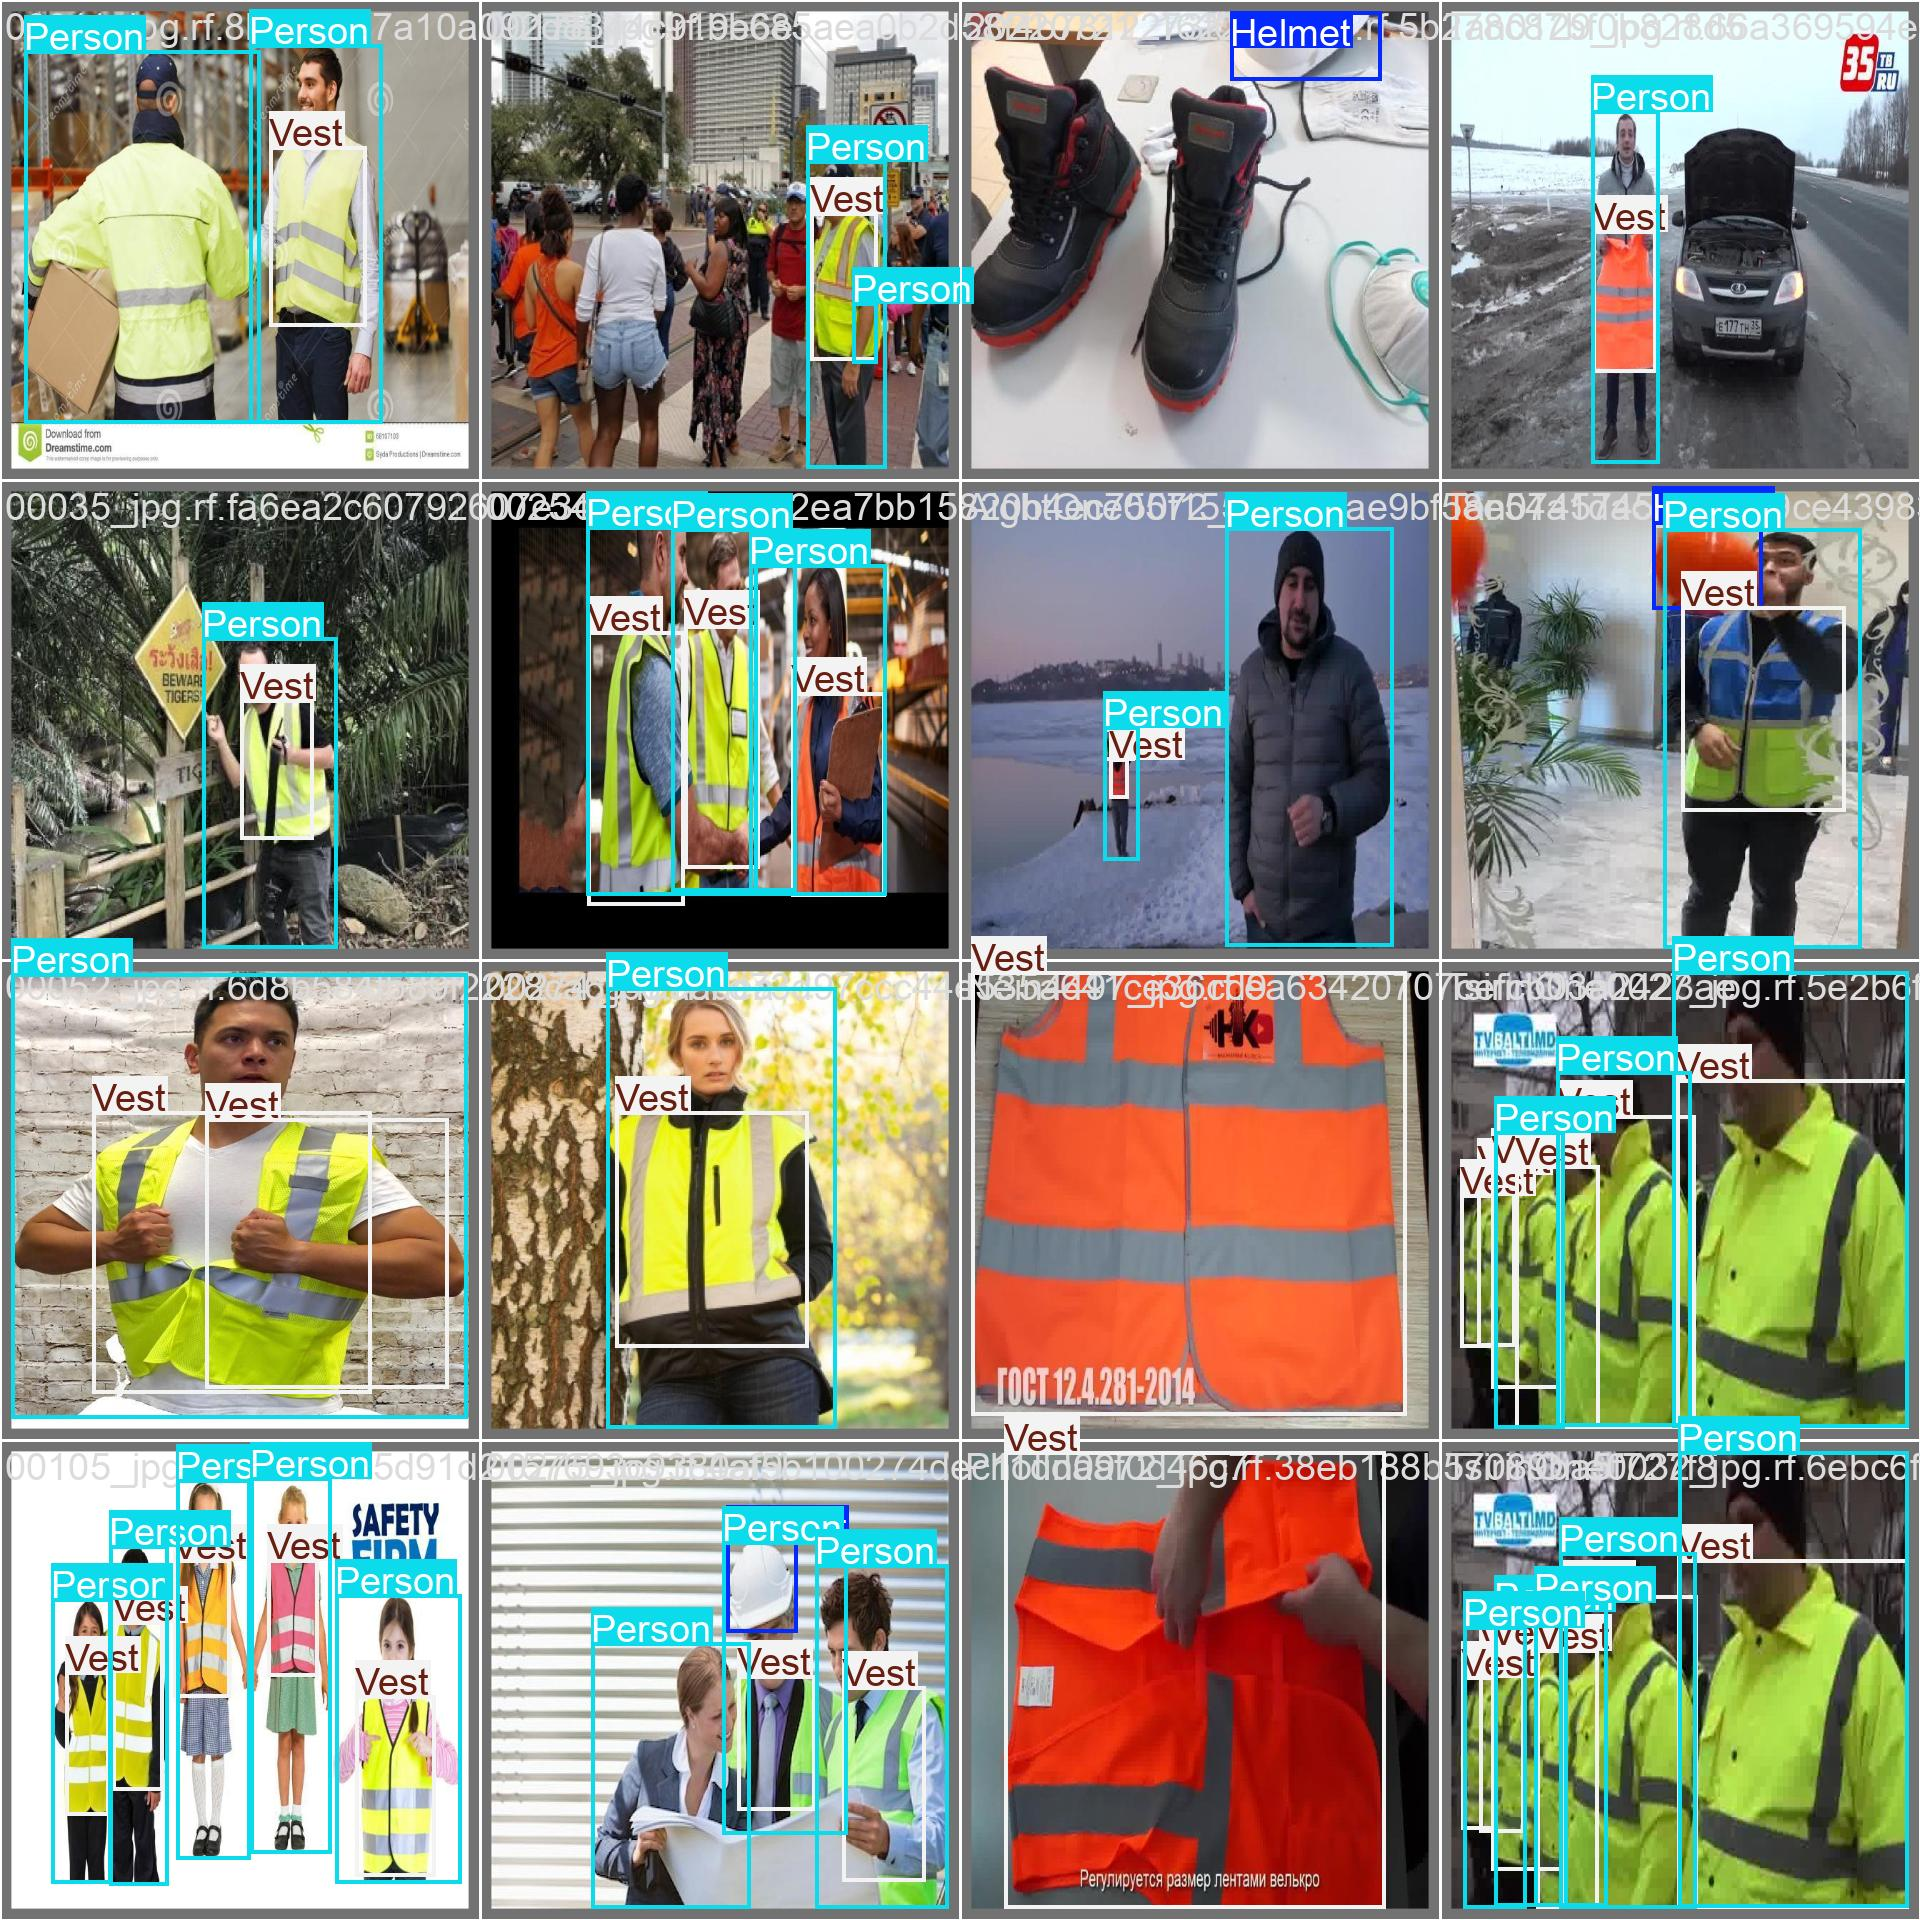

In [ ]:
import glob
import os
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'val' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('val')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")